In [ ]:
!pip install shap

In [2]:
import shap
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
shap.initjs()

customer = pd.read_csv("/content/drive/MyDrive/Обучение/Метрики ML/diabetes.csv")
customer.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = customer.drop("Outcome", axis=1) # Independent variables
y = customer.Outcome # Dependent variable

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a machine learning model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       161
           1       0.62      0.76      0.68        70

    accuracy                           0.79       231
   macro avg       0.75      0.78      0.76       231
weighted avg       0.80      0.79      0.79       231



In [5]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

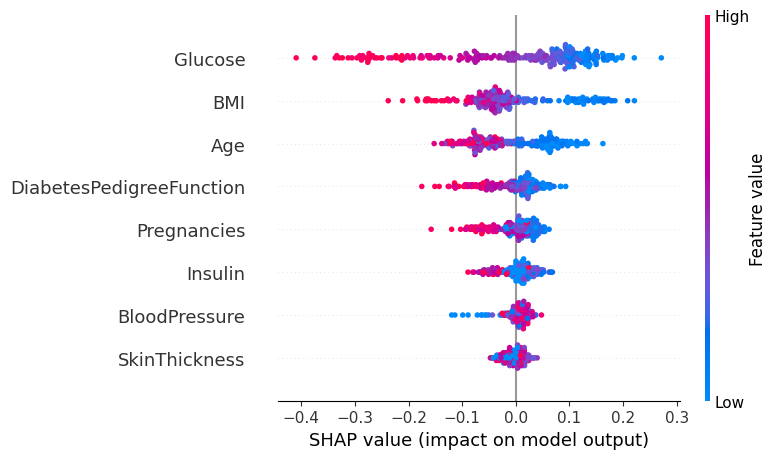

In [16]:
shap.summary_plot(shap_values[:, :, 0], X_test)

# артериальное давление (BloodPressure) имеет высокое значение

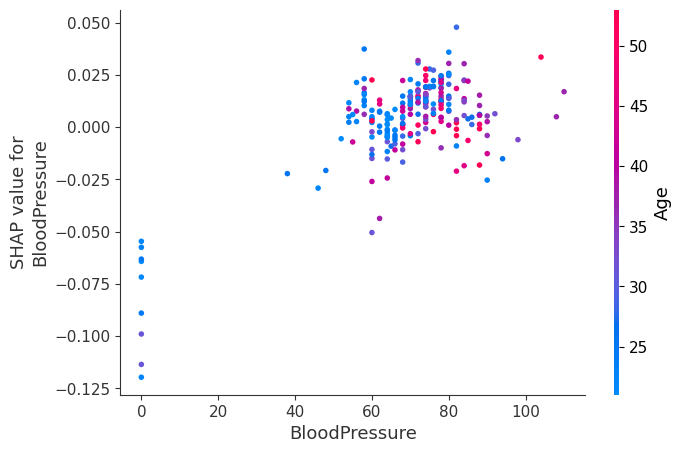

In [19]:
shap.dependence_plot("BloodPressure", shap_values[:, :, 0], X_test,interaction_index="Age")
# наблюдается зависимость артериального давления от возраста

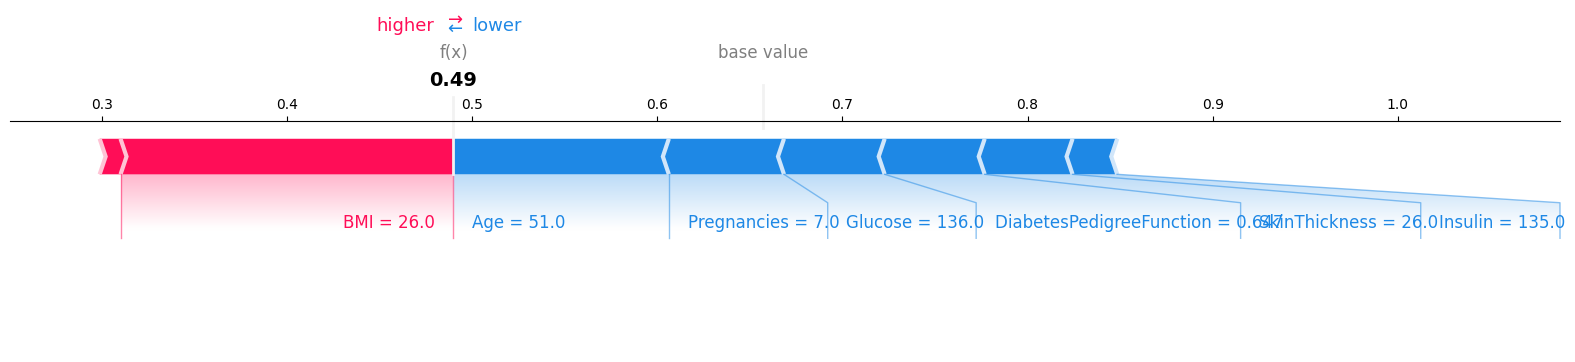

In [8]:
shap.plots.force(explainer.expected_value[0], shap_values[:, :, 0][0,:], X_test.iloc[0, :], matplotlib = True)
# наибольший вклад вносит показатель BMI для модели в предсказание нулевого объекта для нулевого признака

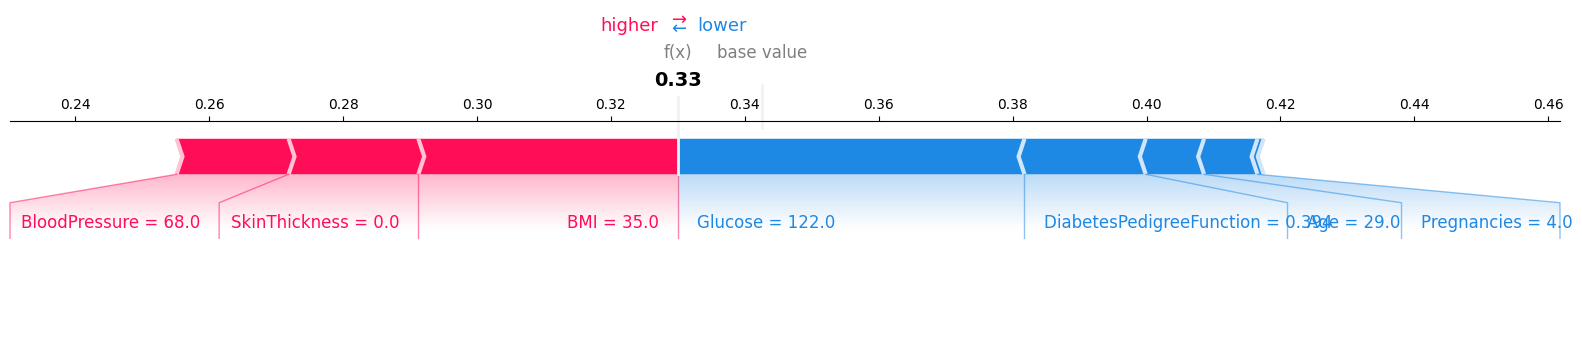

In [9]:
shap.plots.force(explainer.expected_value[1], shap_values[:, :, 1][6, :], X_test.iloc[6, :],matplotlib = True)
# наибольший вклад вносит показатель BMI, затем SkinThickness и BloodPressure для модели в предсказание 6 объекта для 1 признака

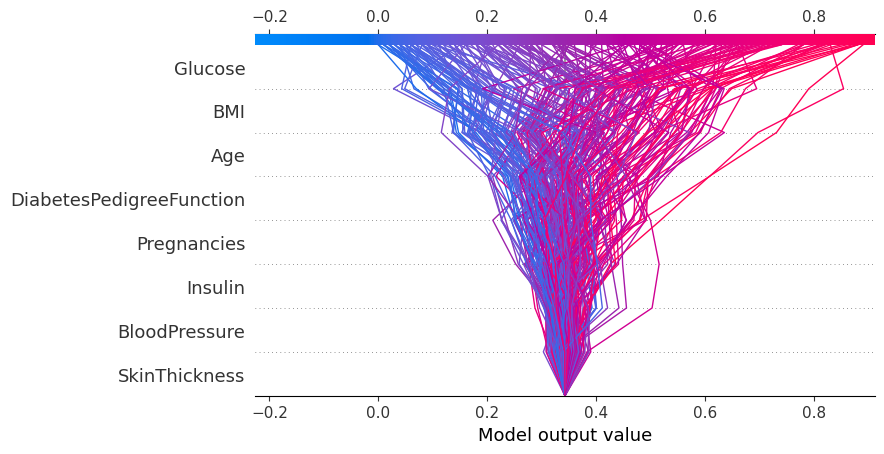

In [10]:
shap.decision_plot(explainer.expected_value[1], shap_values[:, :, 1], X_test.columns)

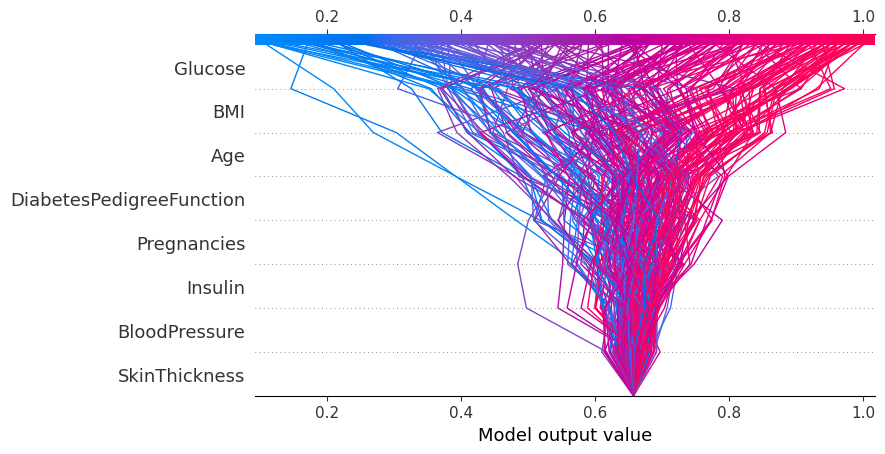

In [11]:
shap.decision_plot(explainer.expected_value[0], shap_values[:, :, 0], X_test.columns)

In [12]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5fdeb88f3d56531fc4ae1dabc4bdcc03bb27af36027e0324f578f231c7bf0417
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [13]:
import lime
from lime import lime_tabular

In [14]:
# creating an instance of the lime tabular explainer
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=X_train.columns,
            class_names=['0', '1'], mode='classification')

In [15]:
# obtaining the explanation
explanation = lime_explainer.explain_instance(data_row=X_test.iloc[1], predict_fn=clf.predict_proba, top_labels=2, num_features=13)

# printing out the explanation
explanation.show_in_notebook()

/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
#  высокое значение имеет показатель BMI, возраст и наследственность для первого класса. А для 0 - класса значения глюкозы и давления.